In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv(r"C:\Users\Lenovo\individual_household_electric_power_consumption.csv", index_col= False)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8828\2037396156.py:4: DtypeWarning: Columns (3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(r"C:\Users\Lenovo\individual_household_electric_power_consumption.csv", index_col= False)


In [2]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.shape

(2075259, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


## Changing object data type to float

In [5]:
# Combine Date and Time columns into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [6]:
# Drop the original Date and Time columns if not needed
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Set the datetime column as the index
df.set_index('datetime', inplace=True)

In [7]:
df.replace('?', np.nan, inplace=True)

In [8]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
df.fillna(method='ffill', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8828\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [12]:
# List of columns to convert
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

# Convert columns to float
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


## Statistical measures

In [14]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.086168e+00,1.233280e-01,2.408416e+02,4.604226e+00,1.110995e+00,1.287958e+00,6.416570e+00
std,1.053172e+00,1.125144e-01,3.235574e+00,4.426775e+00,6.115908e+00,5.786865e+00,8.419505e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.980000e-01,1.000000e-01,2.410200e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.524000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


## VIZUALIZE

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

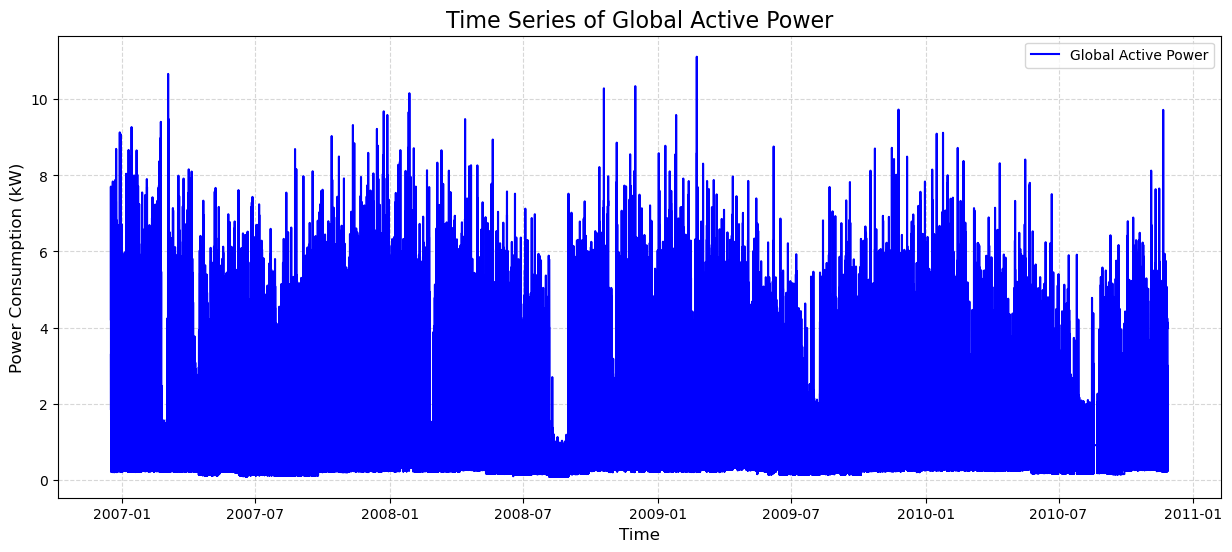

In [16]:
# Visualizing the entire time series
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Global_active_power'], color='blue', label='Global Active Power')
plt.title('Time Series of Global Active Power', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power Consumption (kW)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

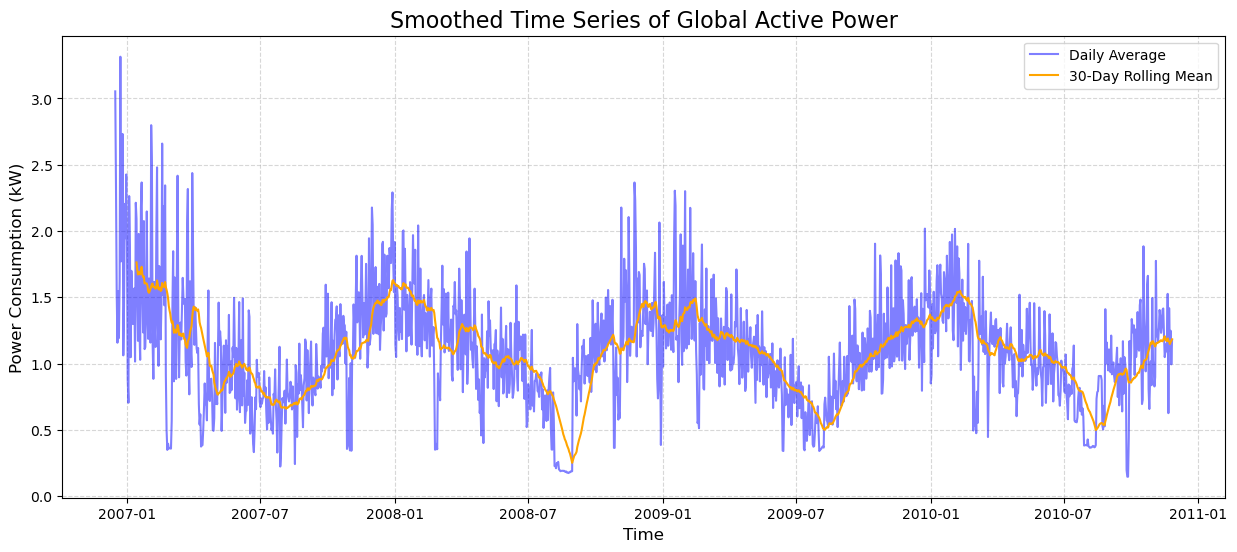

In [17]:
# Calculate 30-day rolling mean
daily_data = df['Global_active_power'].resample('D').mean()
rolling_mean = daily_data.rolling(window=30).mean()

# Plot the smoothed line chart
plt.figure(figsize=(15, 6))
plt.plot(daily_data.index, daily_data, color='blue', alpha=0.5, label='Daily Average')
plt.plot(rolling_mean.index, rolling_mean, color='orange', label='30-Day Rolling Mean')
plt.title('Smoothed Time Series of Global Active Power', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power Consumption (kW)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

WEEKLY AVERAGE VISUALIZATION

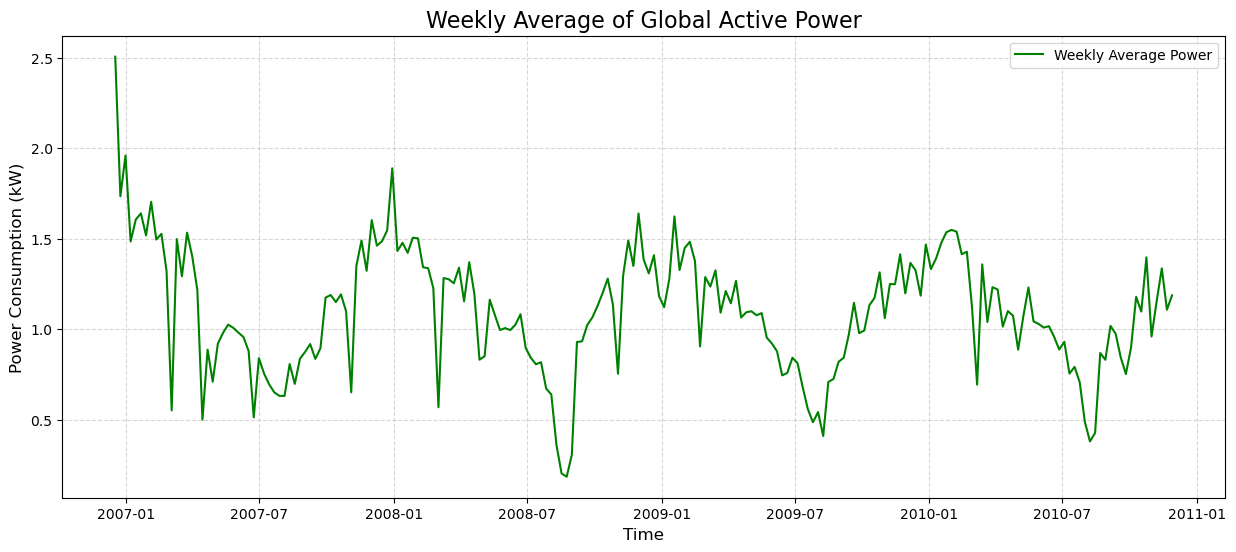

In [18]:
# Resample to weekly data
weekly_data = df['Global_active_power'].resample('W').mean()

# Plot weekly aggregated line chart
plt.figure(figsize=(15, 6))
plt.plot(weekly_data.index, weekly_data, color='green', label='Weekly Average Power')
plt.title('Weekly Average of Global Active Power', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power Consumption (kW)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

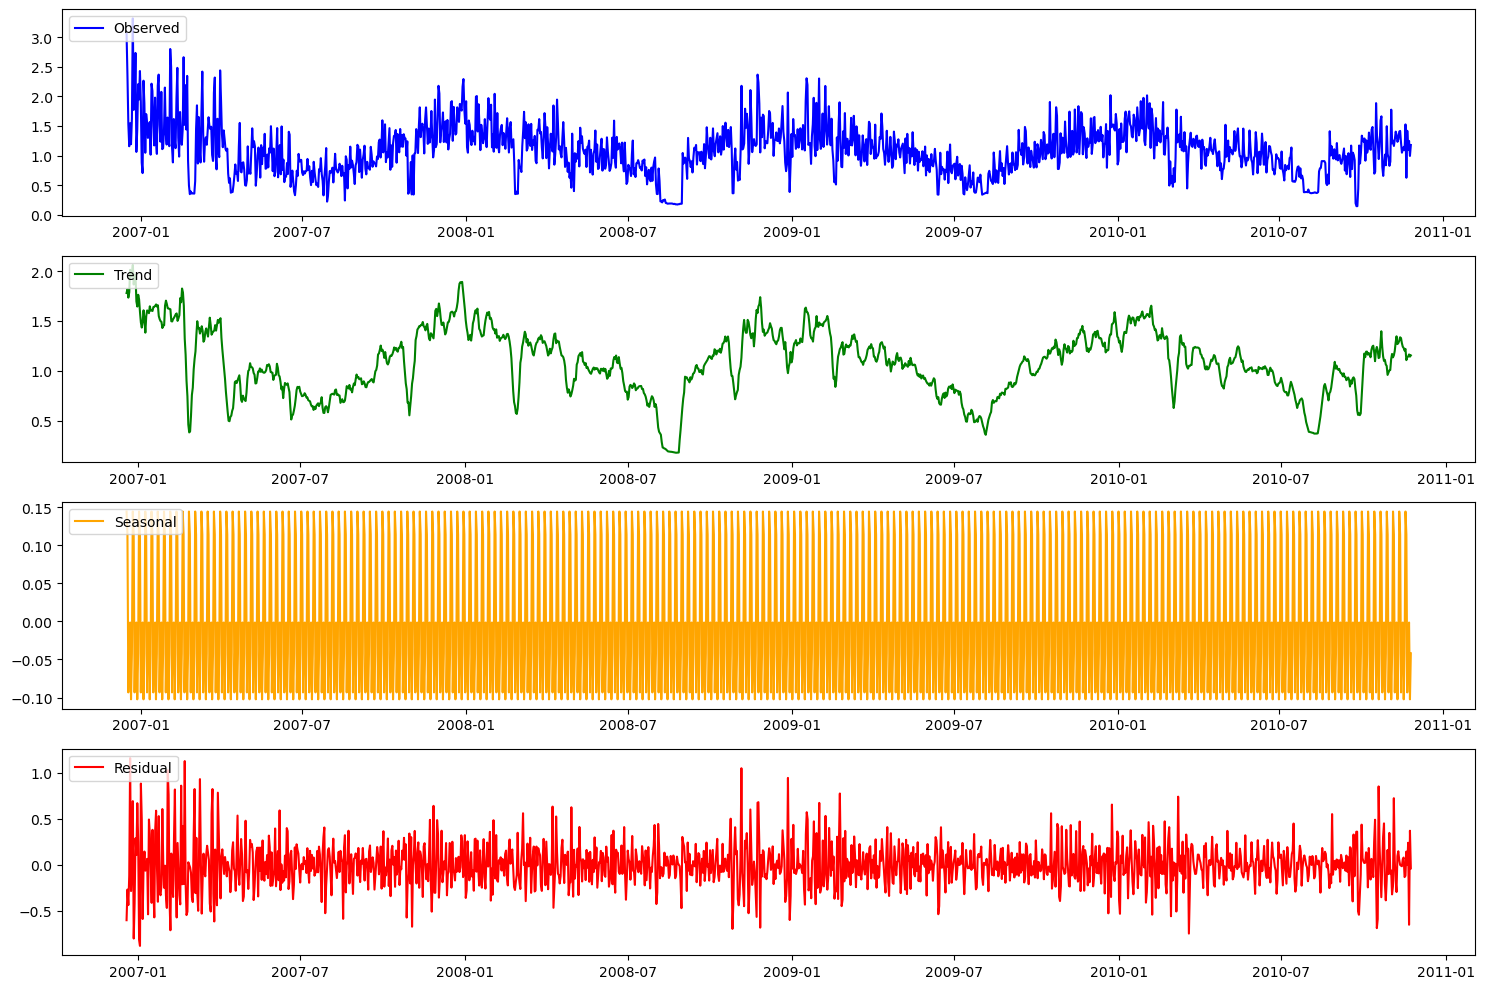

In [19]:
# Perform decomposition
decompose_result = seasonal_decompose(daily_data.dropna(), model='additive')

# Plot the decomposition
plt.figure(figsize=(15, 10))

plt.subplot(411)
plt.plot(decompose_result.observed, label='Observed', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decompose_result.trend, label='Trend', color='green')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decompose_result.seasonal, label='Seasonal', color='orange')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decompose_result.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(daily_data.dropna())

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -3.7347586808460247
p-value: 0.0036499731073696166
The time series is stationary.


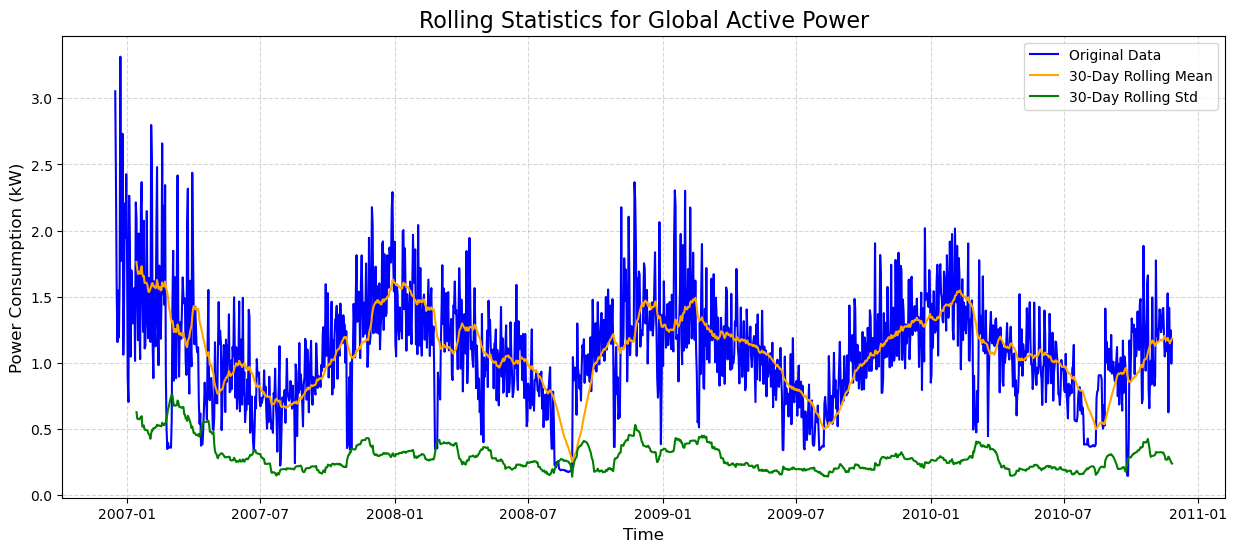

In [21]:
# Rolling statistics
rolling_mean = daily_data.rolling(window=30).mean()
rolling_std = daily_data.rolling(window=30).std()

# Plot
plt.figure(figsize=(15, 6))
plt.plot(daily_data, label='Original Data', color='blue')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label='30-Day Rolling Std', color='green')
plt.title('Rolling Statistics for Global Active Power', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power Consumption (kW)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## CHECKING TYPE OF STATIONARY

C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


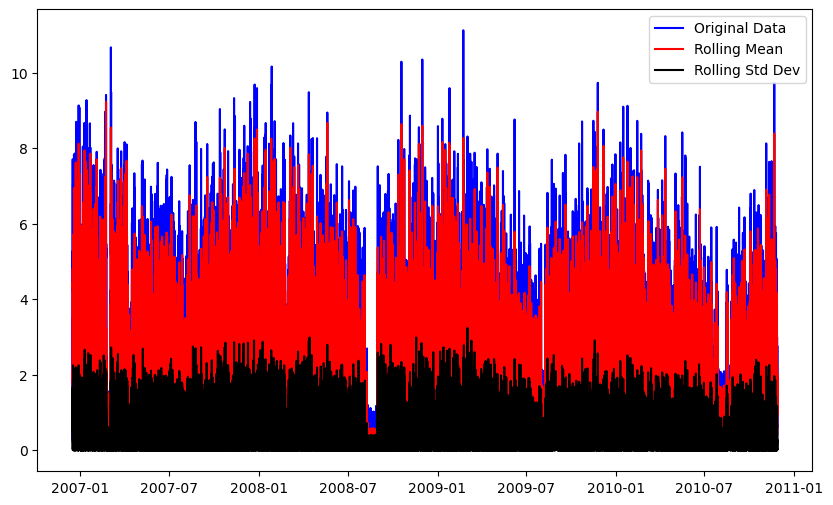

In [22]:
# Rolling mean and standard deviation
rolling_mean = df['Global_active_power'].rolling(window=12).mean()
rolling_std = df['Global_active_power'].rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.plot(df['Global_active_power'], label='Original Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='black')
plt.legend()
plt.show()

## FORECAST

In [23]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

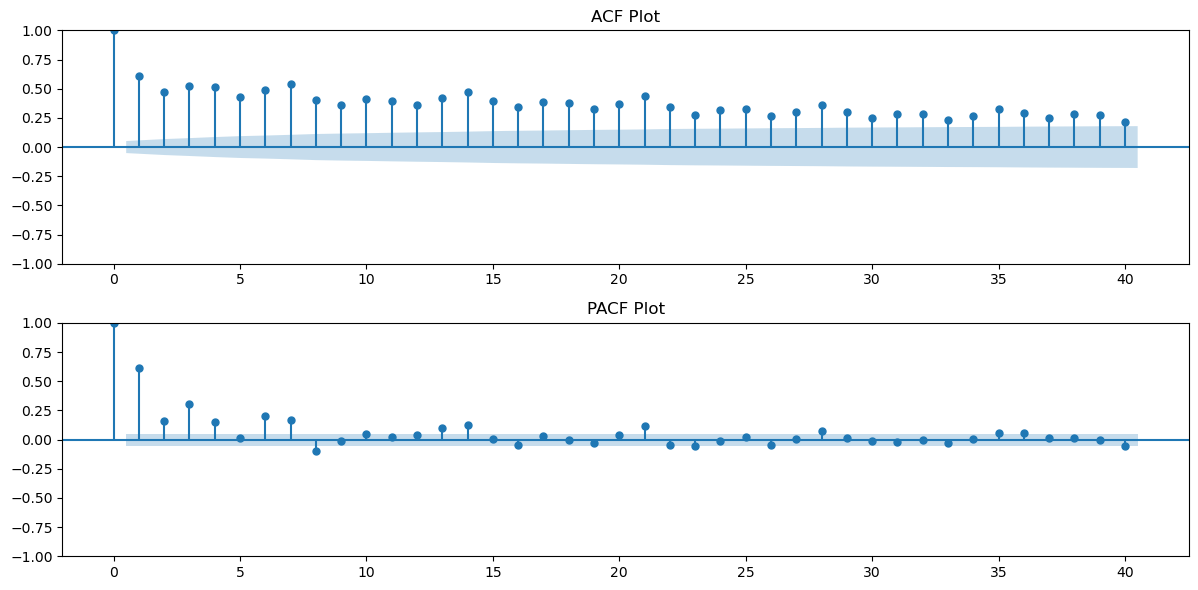

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the original data
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(211)
plot_acf(daily_data.dropna(), ax=plt.gca(), lags=40)
plt.title('ACF Plot')

# PACF plot
plt.subplot(212)
plot_pacf(daily_data.dropna(), ax=plt.gca(), lags=40)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(daily_data, order=(1, 1, 2))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:                 1442
Model:                  ARIMA(1, 1, 2)   Log Likelihood                -337.850
Date:                 Wed, 01 Jan 2025   AIC                            683.699
Time:                         13:23:19   BIC                            704.792
Sample:                     12-16-2006   HQIC                           691.573
                          - 11-26-2010                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1900      0.079     -2.410      0.016      -0.345      -0.035
ma.L1         -0.4198      0.076     -5.540      0.000      -0.568      -0.271
ma.L2         -0.3784      0.058     -6.533 

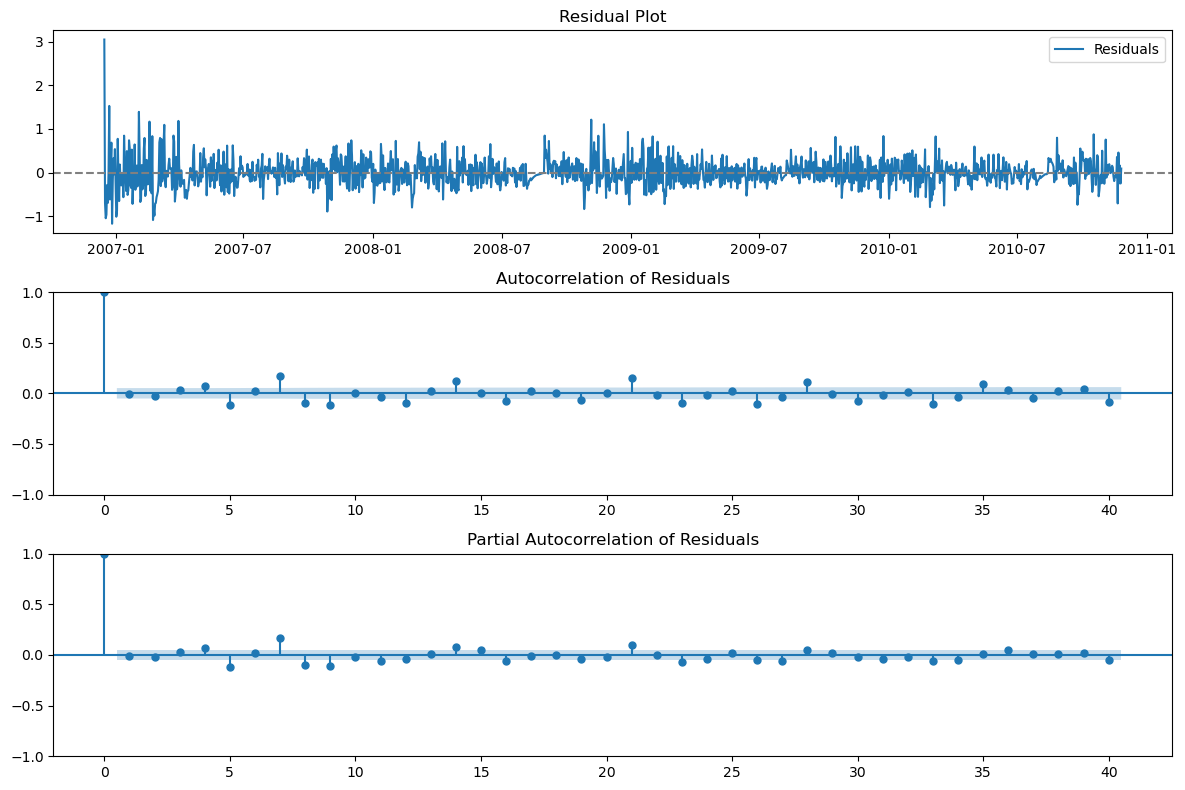

In [26]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Get residuals
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(12, 8))

# Line plot of residuals
plt.subplot(311)
plt.plot(residuals, label="Residuals")
plt.axhline(y=0, color="gray", linestyle="--")
plt.title("Residual Plot")
plt.legend()

# ACF plot of residuals
plt.subplot(312)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title("Autocorrelation of Residuals")

# PACF plot of residuals
plt.subplot(313)
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title("Partial Autocorrelation of Residuals")

plt.tight_layout()
plt.show()

In [27]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings
warnings.filterwarnings("ignore")

# Define grid search function
def evaluate_arima_order(data, p_values, d_values, q_values):
    best_score, best_order = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(data, order=(p, d, q))
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_score:
                        best_score, best_order = aic, (p, d, q)
                except:
                    continue
    print(f"Best ARIMA order: {best_order} with AIC: {best_score}")
    return best_order

# Define ranges for p, d, q
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Perform grid search
best_order = evaluate_arima_order(daily_data, p_values, d_values, q_values)

Best ARIMA order: (2, 0, 2) with AIC: 679.3740632974759


In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(daily_data, order=(2,0,2))
model_fit1 = model.fit()

# Print summary
print(model_fit1.summary())

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:                 1442
Model:                  ARIMA(2, 0, 2)   Log Likelihood                -333.687
Date:                 Wed, 01 Jan 2025   AIC                            679.374
Time:                         13:23:26   BIC                            711.017
Sample:                     12-16-2006   HQIC                           691.185
                          - 11-26-2010                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1228      0.100     11.179      0.000       0.926       1.320
ar.L1          0.7677      0.086      8.919      0.000       0.599       0.936
ar.L2          0.2124      0.083      2.556 

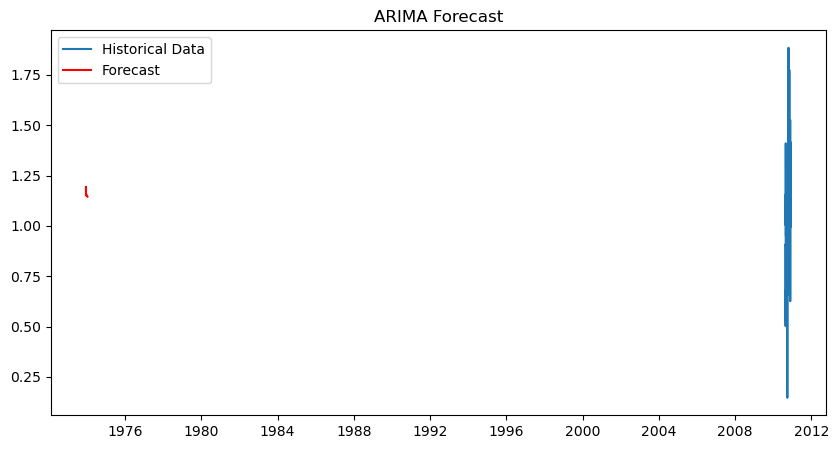

In [29]:
# Forecast future values
forecast_steps = 30  # Number of steps to forecast
forecast = model_fit1.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data[-100:], label="Historical Data")
plt.plot(range(len(daily_data), len(daily_data) + forecast_steps), forecast, color="red", label="Forecast")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

In [36]:
test1 = test['Global_active_power'].resample('D').mean()

In [37]:
# Fit ARIMA model
model = ARIMA(test1, order=(2, 0, 2))
model_fit_test = model.fit()

# Print summary
print(model_fit_test.summary())

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:                  289
Model:                  ARIMA(2, 0, 2)   Log Likelihood                   0.245
Date:                 Wed, 01 Jan 2025   AIC                             11.510
Time:                         14:03:57   BIC                             33.509
Sample:                     02-11-2010   HQIC                            20.325
                          - 11-26-2010                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0250      0.100     10.240      0.000       0.829       1.221
ar.L1          1.4664      0.243      6.045      0.000       0.991       1.942
ar.L2         -0.4806      0.231     -2.085 

In [40]:
forecast_steps = 30  # Number of steps to forecast
forecast_test = model_fit_test.forecast(steps=forecast_steps)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assume `test_data` contains actual future values for the forecasted period
mae = mean_absolute_error(forecast_test, forecast)
rmse = mean_squared_error(forecast_test, forecast, squared=False)
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 0.05211971662174065, RMSE: 0.05402491660273813
